In [1]:
import tensorflow.compat.v1 as tf
#Lets see if tensorflow finds the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import tensorflow as tf

2023-04-13 16:04:15.855782: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 16:04:16.655552: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


2023-04-13 16:04:20.784813: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 16:04:21.112828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 16:04:21.113361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#Lets see if it works
tf.ones(1) + tf.ones(1)

2023-04-13 16:04:21.122861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 16:04:21.123484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 16:04:21.123604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 16:04:21.123673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [3]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

import os # OS module provides various operating system-related functions to the code
import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle

# used for splitting data into training and testing sets in Python.
from sklearn.model_selection import train_test_split 

# for generating a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.models import load_model


# Classes and functions from the Keras library which is used for building and training deep learning models in Python.
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# which is a high-level neural networks API used for building and training deep learning models in Python.
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


from plots import plot_confusion_matrix, plot_accuracy, plot_loss

In [4]:
%store -r experiment_ID
print(experiment_ID)
%store -r save_dir
print(save_dir)
%store -r model_version
print(model_version)

2.6
/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/output/pickles
BPNN_v2_1


In [5]:
dir_path = save_dir
history_file = os.path.join(dir_path, 'history.pkl')
train_images_file = os.path.join(dir_path, 'train_images.pkl')
train_labels_file = os.path.join(dir_path, 'train_labels.pkl')
val_images_file = os.path.join(dir_path, 'val_images.pkl')
val_labels_file = os.path.join(dir_path, 'val_labels.pkl')

In [6]:
# Load the history object from the pickle file
with open(os.path.join(dir_path,'history.pkl'), 'rb') as f:
    history = pickle.load(f)
    
with open(os.path.join(dir_path,'train_images.pkl'), 'rb') as f:
    train_images = pickle.load(f)
    
with open(os.path.join(dir_path,'train_labels.pkl'), 'rb') as f:
    train_labels = pickle.load(f)
    
with open(os.path.join(dir_path,'val_images.pkl'), 'rb') as f:
    val_images = pickle.load(f)
    
with open(os.path.join(dir_path,'val_labels.pkl'), 'rb') as f:
    val_labels = pickle.load(f)

In [7]:
base_model_acc_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/output/accuracy"
base_model_loss_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/output/loss"
base_model_cm_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/output/cm"
model_path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/output/pickles"

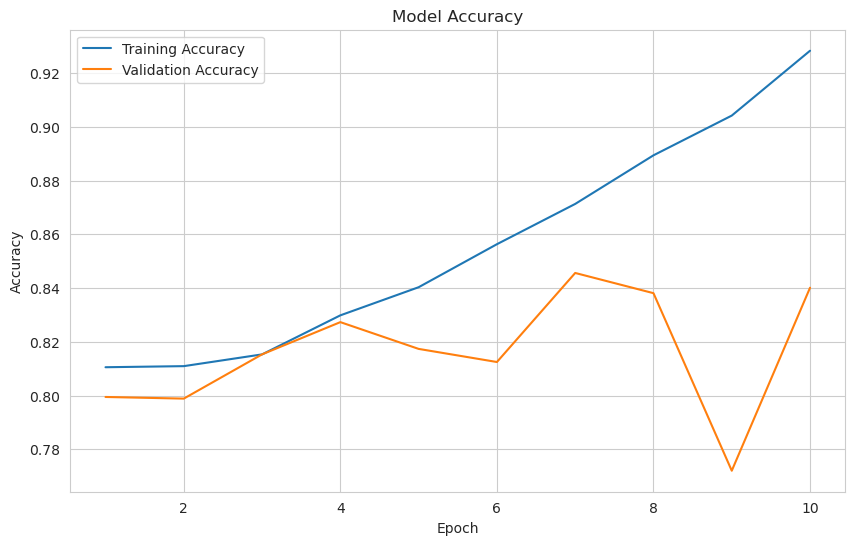

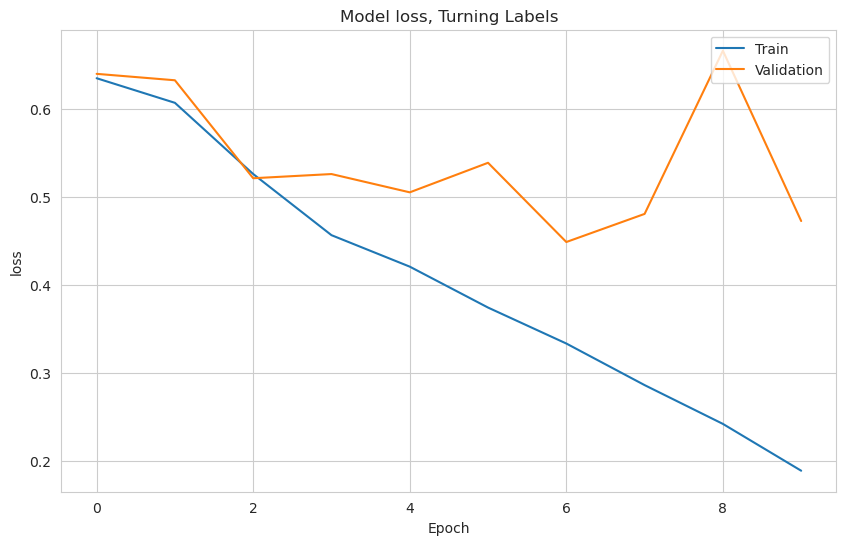

2023-04-13 16:05:10.956834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


 19/615 [..............................] - ETA: 5s

2023-04-13 16:05:11.993378: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


154/154 [==============================] - 2s 10ms/step


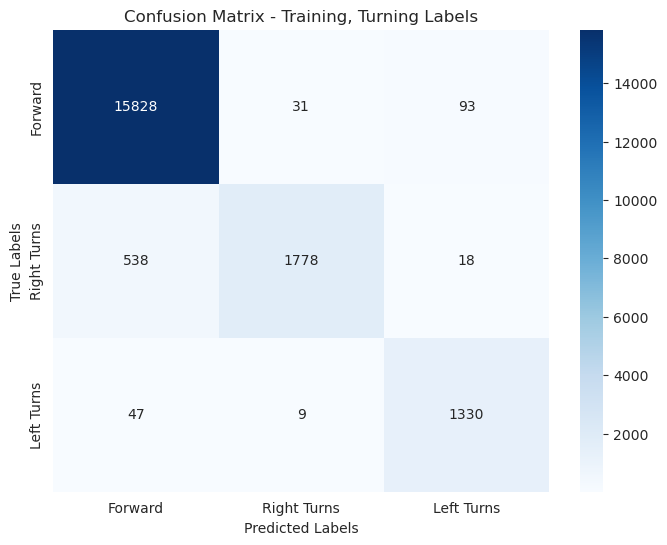

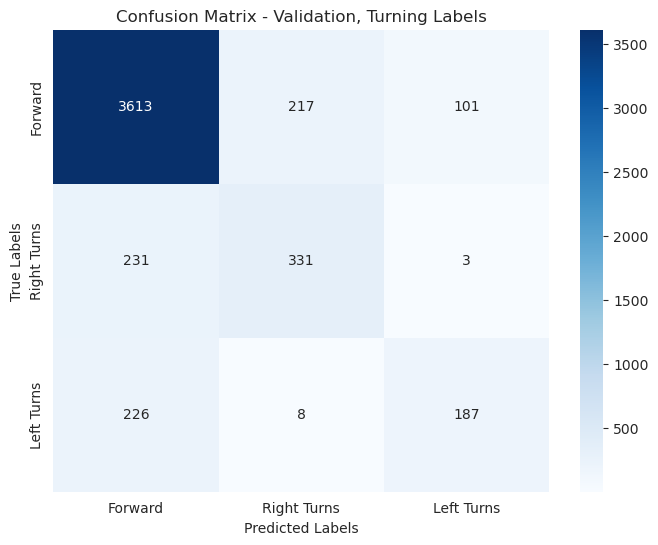

F1 score is: 0.840


In [8]:
plot_accuracy(experiment_ID, history, base_model_acc_dir)
plot_loss(experiment_ID, history, base_model_loss_dir)
no_of_behaviors = ['Forward', 'Right Turns', 'Left Turns']
plot_confusion_matrix(experiment_ID, no_of_behaviors, train_labels, val_labels, train_images, val_images, base_model_cm_dir, model_path, model_version)